In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
data=pd.read_csv("C:/Users/KUNAL/Downloads/Salary_Data.csv")

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [6]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


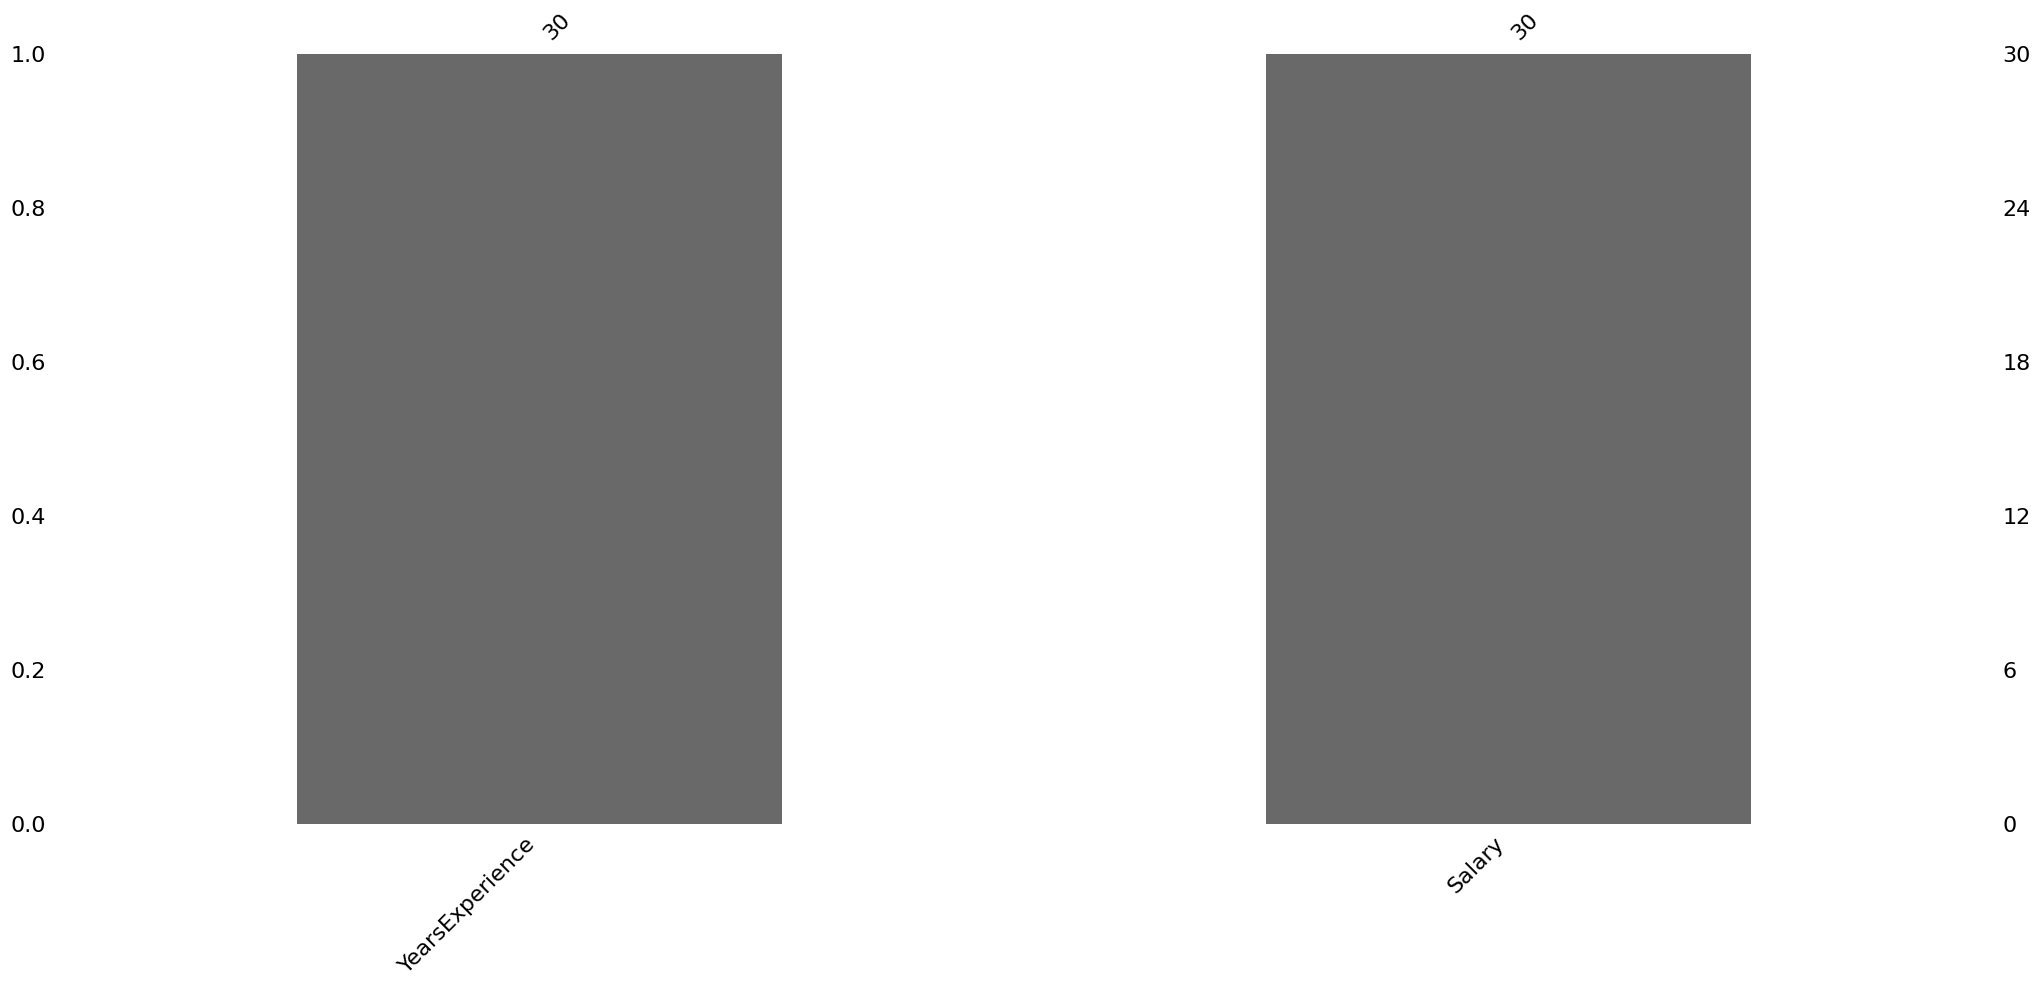

In [6]:
import missingno as msn
msn.bar(data)
plt.show()    #graph shows the non-null value. here the graph height is 1.o(100%). hence, no null values

In [17]:
x=data[["YearsExperience"]]
y=data["Salary"]

In [19]:
best_accuracy=0
best_random_state=0
for random_state in range(10000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=random_state)
    model=LinearRegression()
    model.fit(x_train,y_train)
    accuracy=model.score(x_test,y_test)
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_random_state=random_state

print(best_random_state)
print(best_accuracy)

9014
0.99842716176972


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=best_random_state)  #no scaling in simple linear regression

In [21]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred=model.predict(x_test)

In [23]:
R2_score=r2_score(y_test,y_pred)


In [24]:
R2_score

0.99842716176972

In [28]:
print(x_train.shape)
print(y_pred.shape)


(24, 1)
(6,)


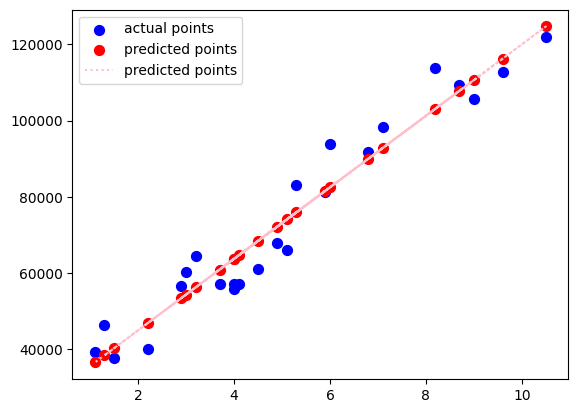

In [34]:
#plotting of line of regression(for training data)
plt.scatter(x_train,y_train,color="blue",s=50,label="actual points")
plt.scatter(x_train,model.predict(x_train),color="red",s=50,label="predicted points")
plt.plot(x_train,model.predict(x_train),color="pink",label="predicted points", linestyle="dotted")
plt.legend()
plt.show()

[]

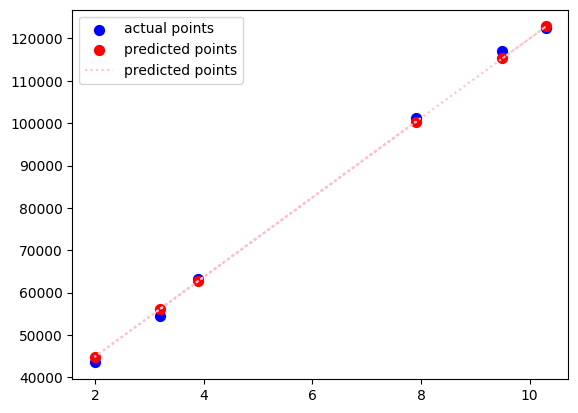

In [38]:
#plotting line of regression for testing data
plt.scatter(x_test,y_test,s=50,color="blue", label="actual points")
plt.scatter(x_test,y_pred,s=50,color="red",label="predicted points")
plt.plot(x_test,y_pred,color="pink",label="predicted points",linestyle="dotted")
plt.legend()
plt.plot()

In [41]:
#getting slope and intercept
m=model.coef_
c=model.intercept_
print(m,c)

[9385.56304023] 26148.74880284306


In [43]:
MSE= mean_squared_error(y_test,y_pred)
MSE

1521203.9967434267